In [1]:
import os
import pandas as pd

# Get the path to the directory containing this script
script_dir = os.getcwd()

# Get the parent directory of the script directory
parent_dir = os.path.dirname(script_dir)
print(parent_dir)
# Get the parent directory of the parent directory
grandparent_dir = os.path.dirname(parent_dir)

# Define the path to the file relative to the current working directory
file_path = os.path.join(grandparent_dir, 'data', 'raw_data', 'churn.csv')

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path,index_col=0)
df=df.iloc[:,:-2]

# Print the first few rows of the DataFrame to verify that it was loaded correctly


/home/dimi/BeCode/credit-card-churn-prediction/scripts


In [2]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

 we can say that genders are uniformly distributed.

In [2]:
# Defining plot design
def plot_design():
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    plt.box(False)
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    plt.grid(b=None)

EDA categorical variables

/tmp/ipykernel_5120/2502338612.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i[0]+1)
/tmp/ipykernel_5120/3940315156.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)
/tmp/ipykernel_5120/3940315156.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)
/tmp/ipykernel_5120/3940315156.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)
/tmp/ipykernel_5120/3940315156.py:9: MatplotlibDeprecationWarning: The '

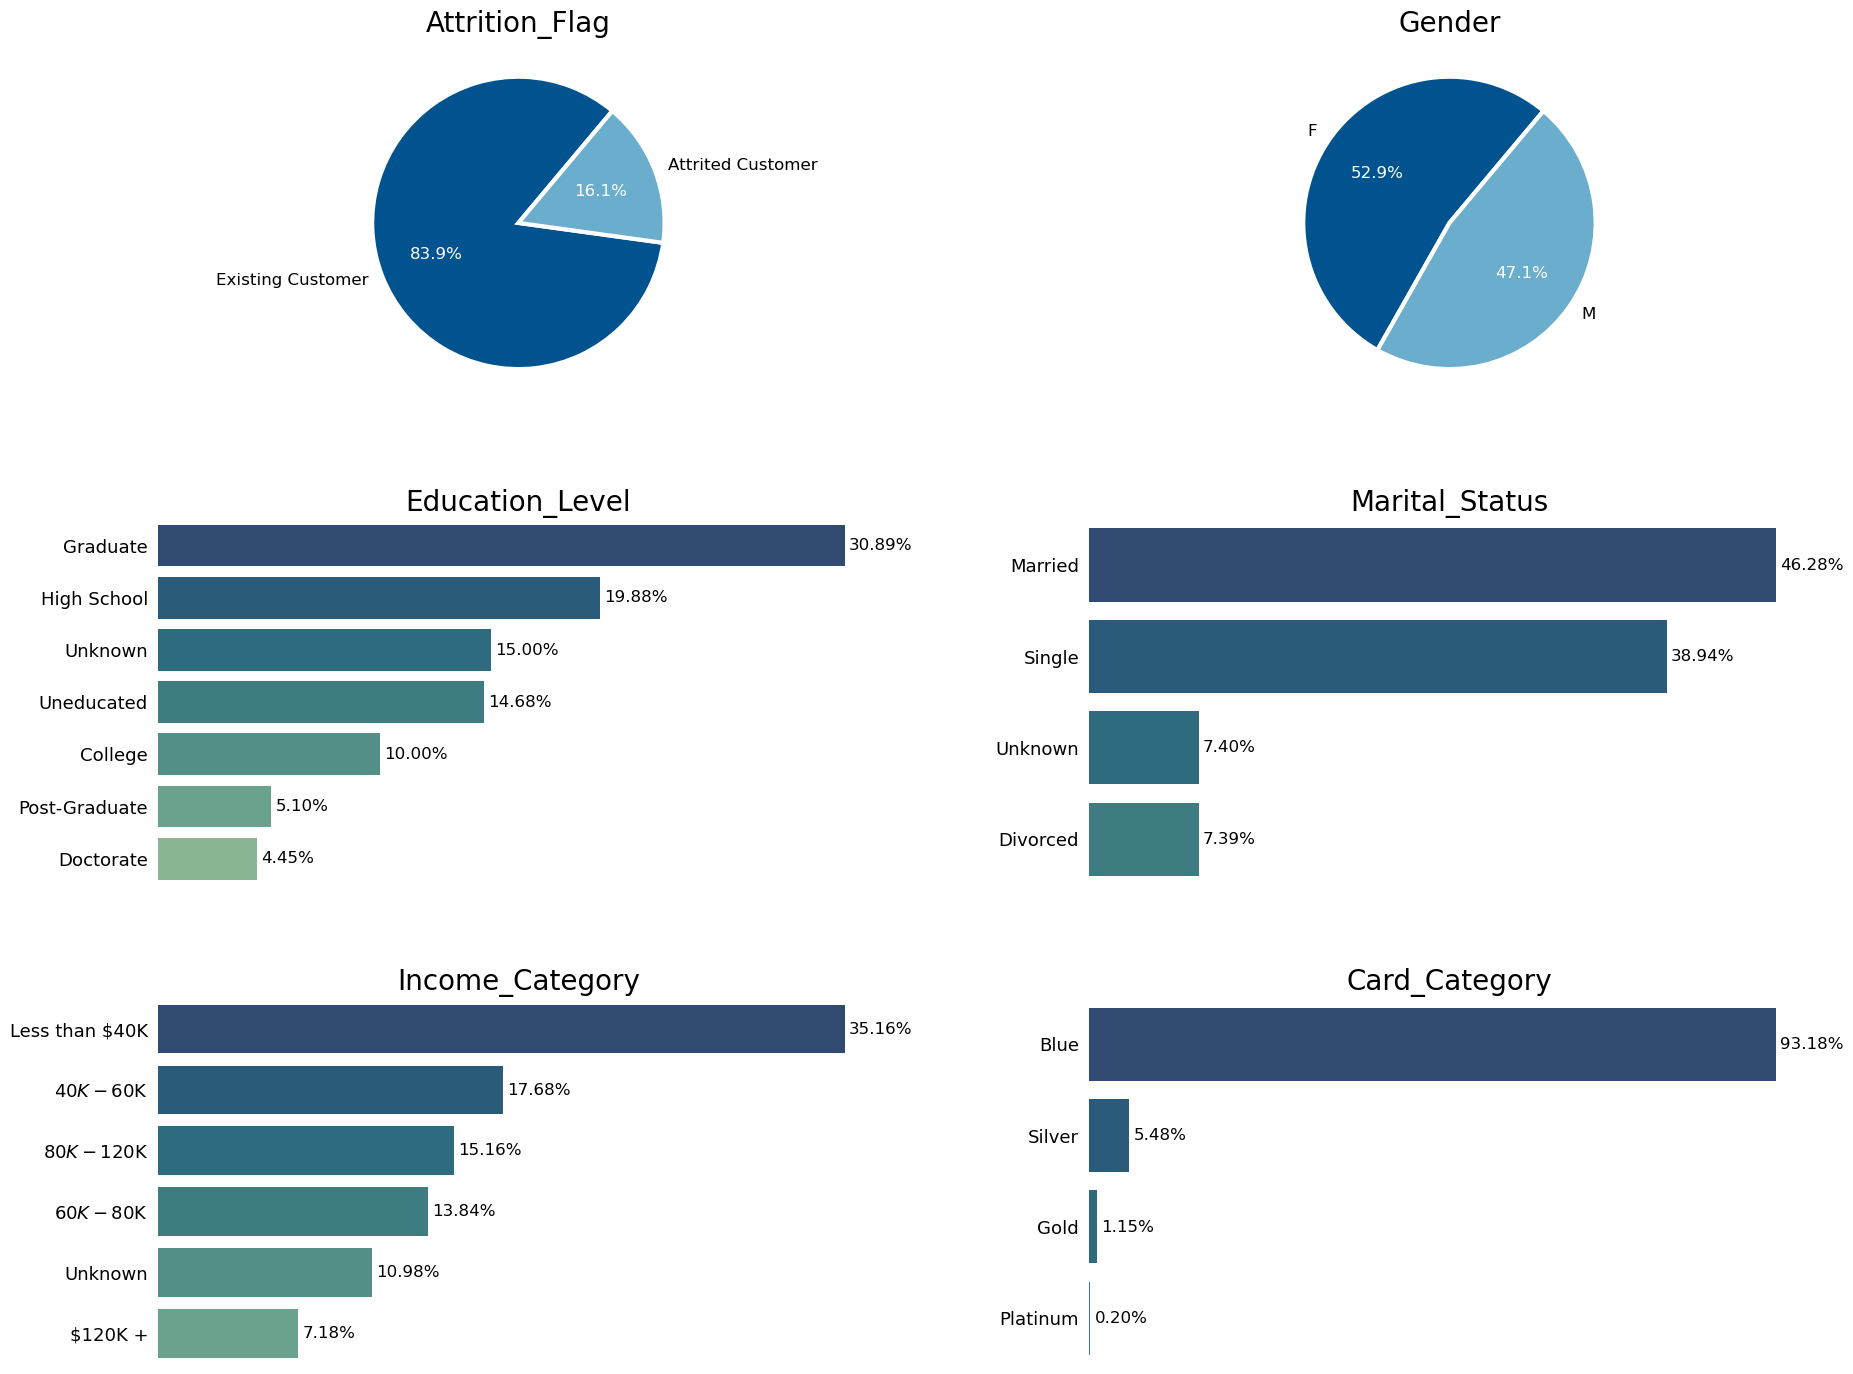

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Select categorical variables
categ = df.select_dtypes(include=object).columns

# Visualize
fig, ax = plt.subplots(figsize =(20, 20))
fig.patch.set_facecolor('white')
#mpl.rcParams['font.family'] = 'Hiragino Kaku Gothic Pro'
mpl.rcParams['font.size'] = 12

colors = sns.color_palette("crest_r", n_colors=7).as_hex()

# Loop columns
for i in (enumerate(categ)):
    plt.subplot(4, 2, i[0]+1)
    
    if df[i[1]].value_counts().count() > 2:
        ax = sns.countplot(y = i[1], data = df, order=df[i[1]].value_counts().index, palette=colors)
        pct = df[i[1]].value_counts(ascending=False, normalize=True).values * 100
        ax.bar_label(container=ax.containers[0], labels=list(map('{:.2f}%'.format,pct)), padding=3, size=12, color='black')
        ax.grid(False)
        ax.grid(visible=None)
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.set_xticklabels('')
        plot_design()

    else:
        _, texts, pcts = plt.pie(
            df[i[1]].value_counts(), 
            labels=df[i[1]].value_counts().index, 
            colors= ['#00538F', '#6AADCC'],
            autopct='%1.1f%%', 
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            startangle=50)
        for pcts in pcts:
          pcts.set_color('white')
        plt.title(i[1], fontsize=20, color='black')

Numerical variables

/tmp/ipykernel_5120/1063220661.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7, 2, i[0]+1)
/tmp/ipykernel_5120/1063220661.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)
/tmp/ipykernel_5120/3940315156.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)
/tmp/ipykernel_5120/1063220661.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)
/tmp/ipykernel_5120/3940315156.py:9: MatplotlibDeprecationWarning: The

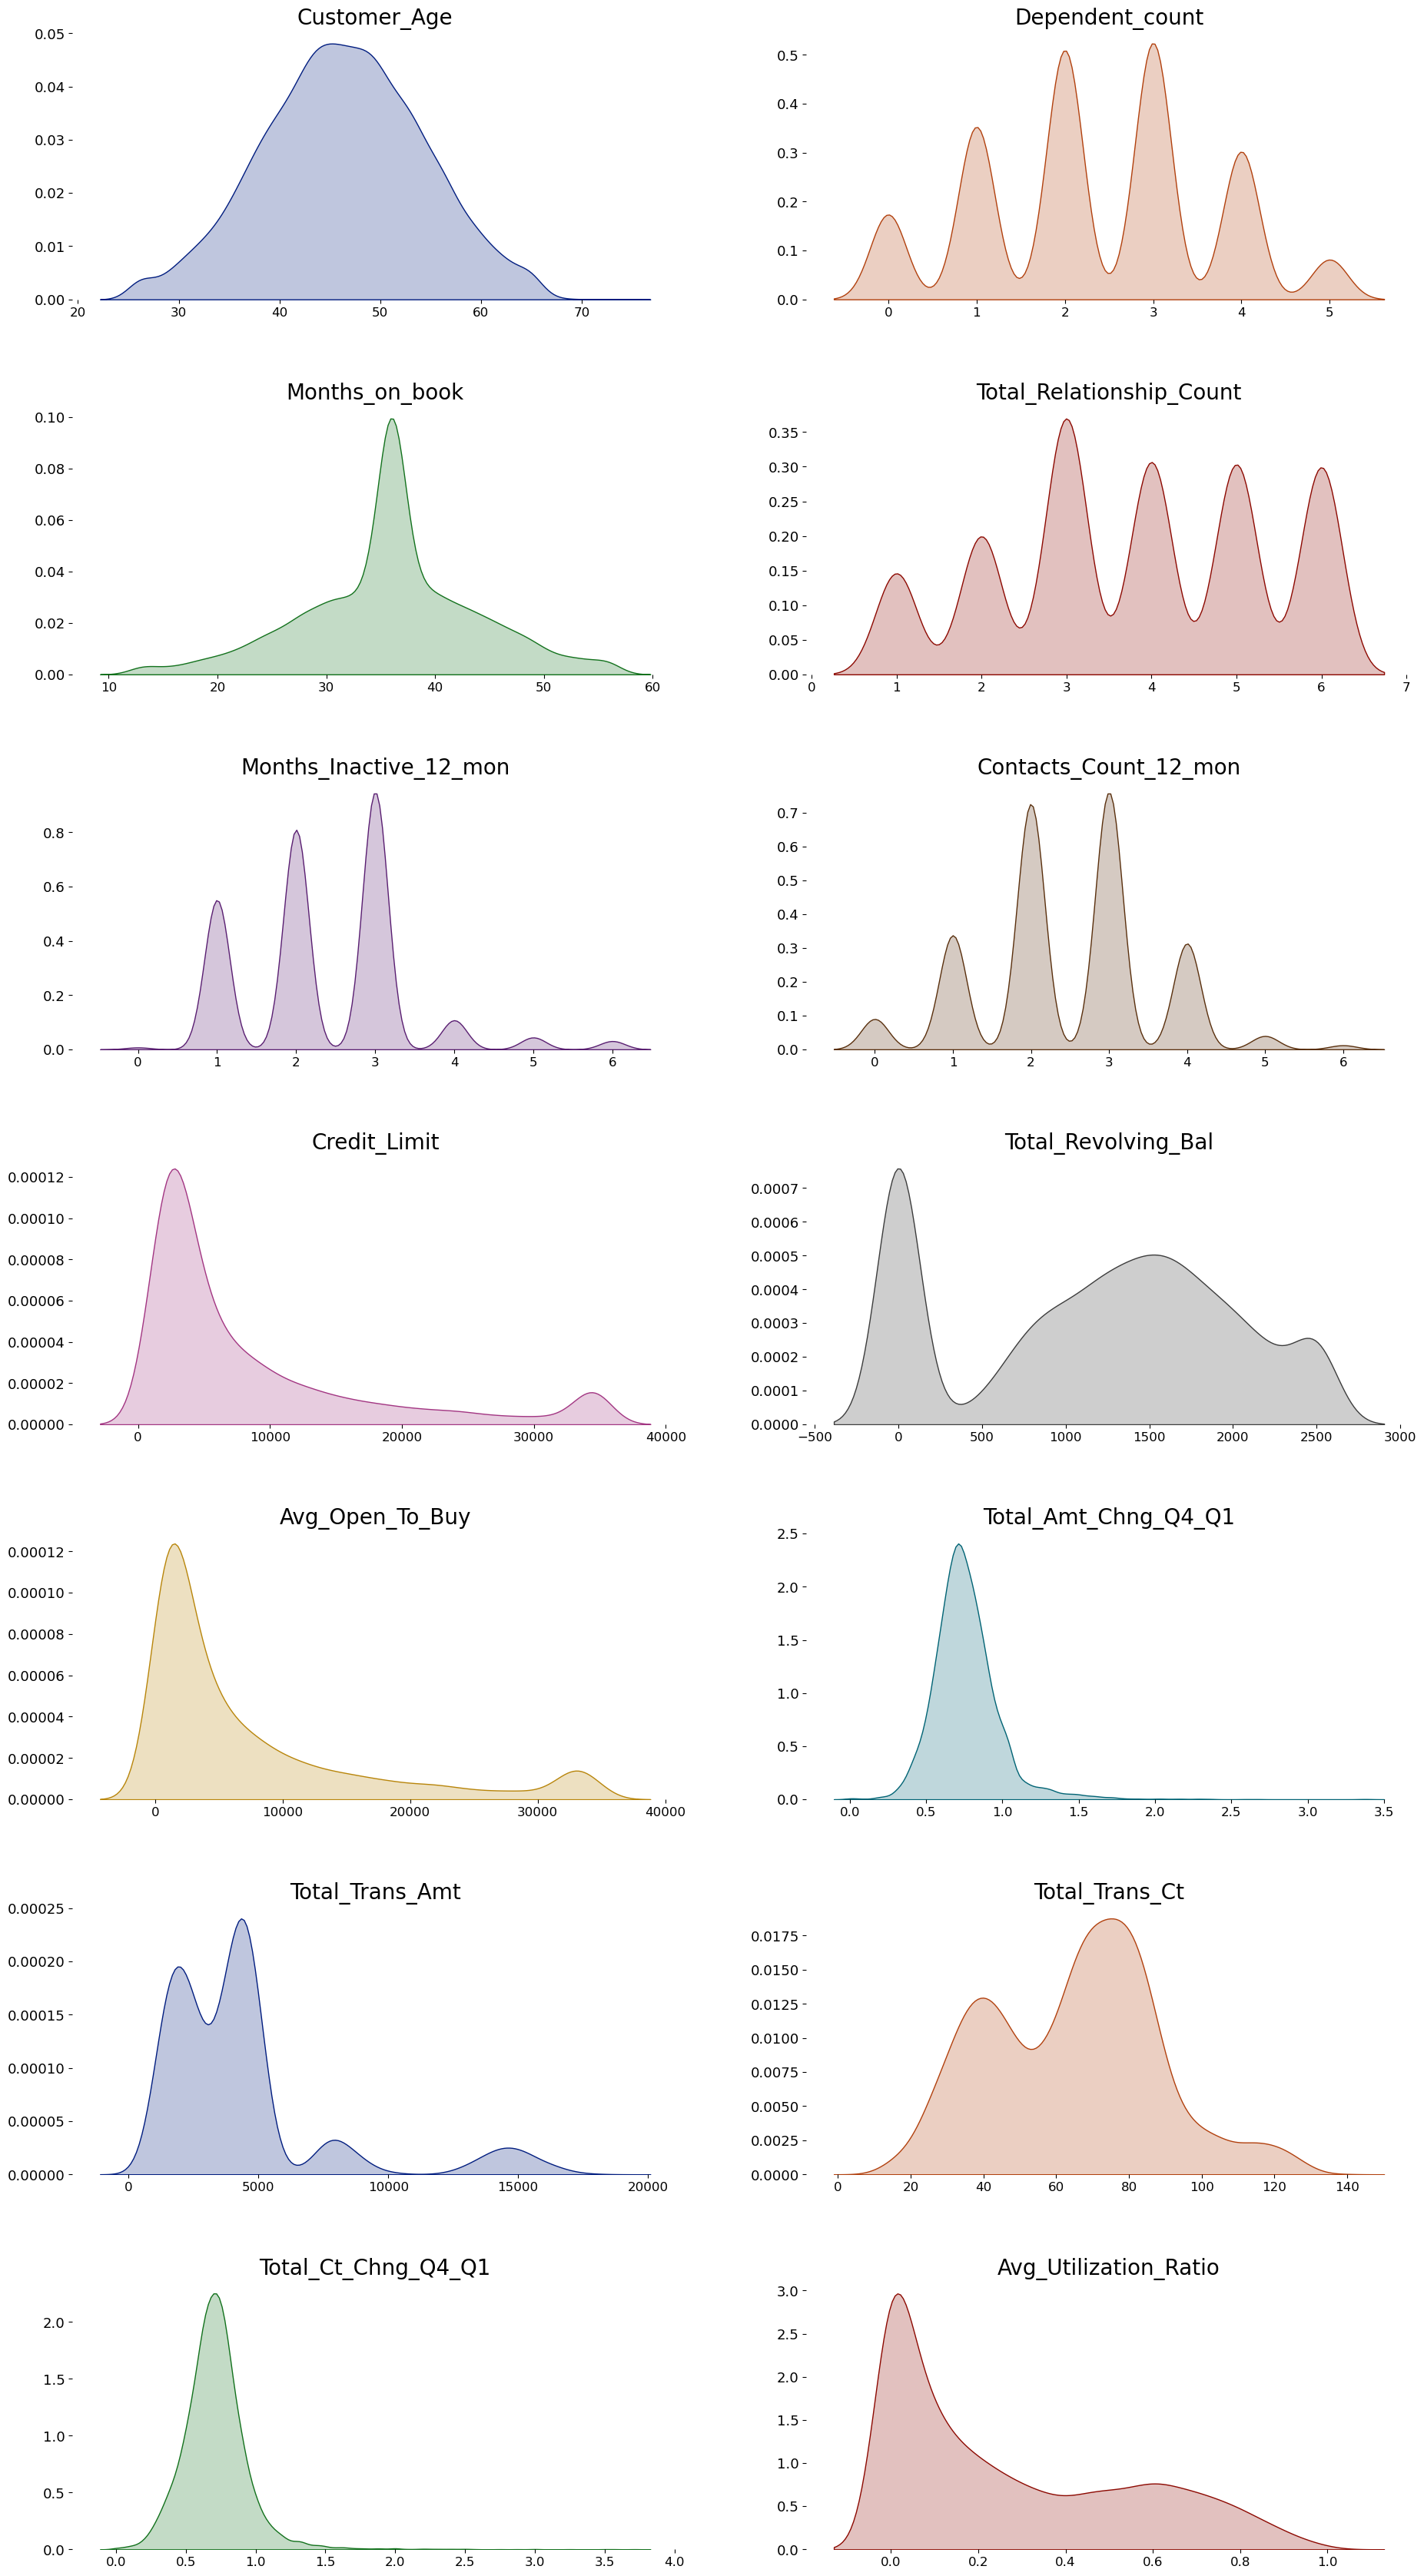

In [4]:
# Select numerical variables
numeric = df.select_dtypes(exclude=object).columns

# Visualize
fig, ax = plt.subplots(figsize =(20, 35))
fig.patch.set_facecolor('white')
# mpl.rcParams['font.family'] = 'Hiragino Kaku Gothic Pro'
mpl.rcParams['font.size'] = 12

colors = sns.color_palette("dark", n_colors=14).as_hex()

# Loop columns
for i in (enumerate(numeric)):
    plt.subplot(7, 2, i[0]+1)
    sns.kdeplot(x = i[1], data = df, color=colors[i[0]], fill=True)
    plt.grid(b=None)
    plot_design()

Preprocessing: skew variables

In [6]:
skew_limit = 0.5
skew_vals = df[numeric].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
Total_Ct_Chng_Q4_Q1,2.064031
Total_Trans_Amt,2.041003
Total_Amt_Chng_Q4_Q1,1.732063
Credit_Limit,1.666726
Avg_Open_To_Buy,1.661697
Avg_Utilization_Ratio,0.718008
Months_Inactive_12_mon,0.633061


In [7]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Normalize skewed features
for col in skew_cols.index:
    df[col] = boxcox1p(df[col], boxcox_normmax(df[col] + 1))

/home/dimi/miniconda3/envs/datascience/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


scaling features

In [8]:
# Scaling features
from sklearn.preprocessing import MinMaxScaler

for col in df[numeric]:
    df[col] = MinMaxScaler().fit_transform(df[[col]])

encoding categorical features

In [9]:
# One hot encoding
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

# Select categorical variables
categ = df.select_dtypes(include=object).columns

# Encoding with get dummies
df = pd.get_dummies(df, columns=categ)

# Drop columns to avoid multicollinearity
df= df[df.columns.drop(list(df.filter(regex='Unknown')))]
df= df[df.columns.drop(list(df.filter(regex='Platinum')))]

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Silver
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,0,0.404255,0,0.6,0.604651,0.8,0.262481,0.500000,0.795967,0.308701,...,1,0,0,0,1,0,0,1,0,0
818770008,0,0.489362,1,1.0,0.720930,1.0,0.262481,0.333333,0.683417,0.343266,...,0,1,0,0,0,0,1,1,0,0
713982108,0,0.531915,0,0.6,0.534884,0.6,0.262481,0.000000,0.391116,0.000000,...,1,0,0,0,0,1,0,1,0,0
769911858,0,0.297872,1,0.8,0.488372,0.4,0.760075,0.166667,0.379005,1.000000,...,0,0,0,0,0,0,1,1,0,0
709106358,0,0.297872,0,0.6,0.186047,0.8,0.262481,0.000000,0.508545,0.000000,...,1,0,0,0,1,0,0,1,0,0


Data Upsampling Using SMOTE Algorithm


In [10]:
# Split target & features
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [11]:
# Dealing with imbalanced dataset
import imblearn


In [12]:
from imblearn.over_sampling import SMOTE

In [13]:


# Upsampling with SMOTE algorithm
smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_smote.shape}''')

print('\nBalance of positive and negative classes (%):')
y_smote.value_counts(normalize=True) * 100

Shape of X before SMOTE: (10127, 32)
Shape of X after SMOTE: (17000, 32)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Attrition_Flag, dtype: float64

Dimensionality Reduction


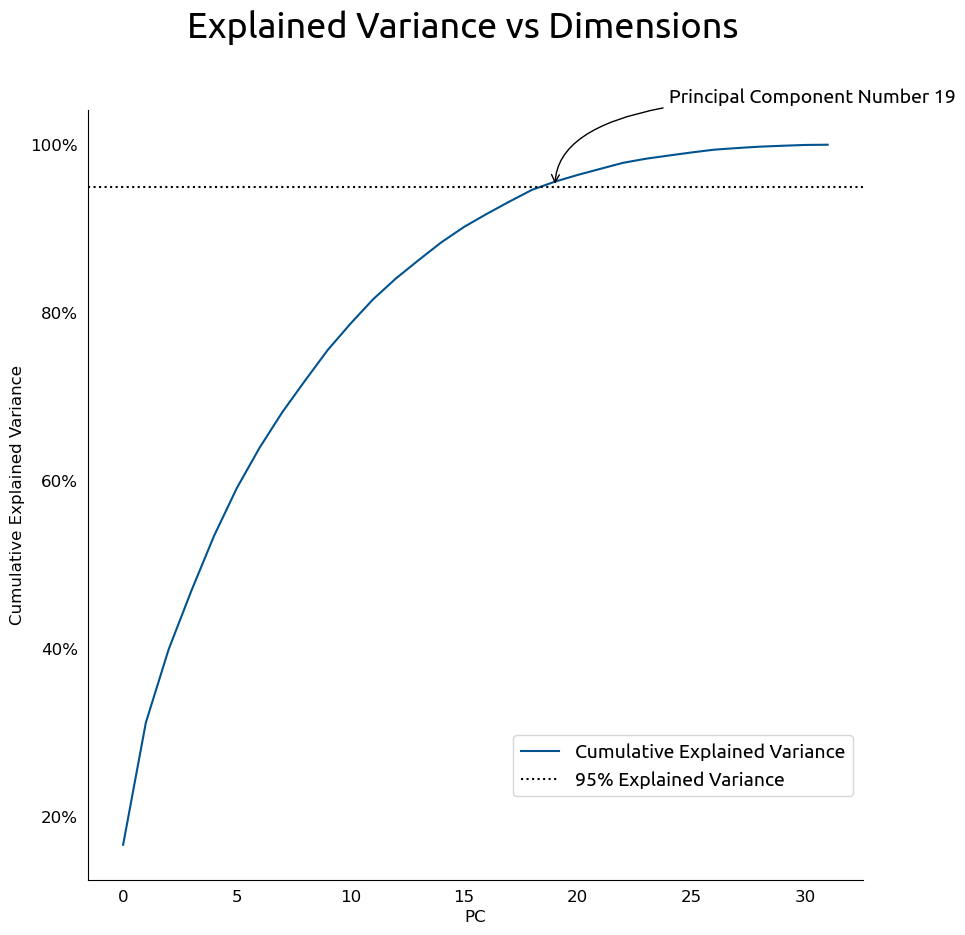

In [15]:
#Using elbow-plot variance/dimensions
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick
import numpy as np
pca = PCA()
pca.fit(X_smote)

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]

# Visualize
fig, ax = plt.subplots(figsize =(10, 10))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'Ubuntu'
mpl.rcParams['font.size'] = 14

ax.plot(d,cumsum, color = '#00538F', label='Cumulative Explained Variance')

ax.axhline(y = 95, color='black', linestyle=':', label = '95% Explained Variance')
ax.legend(loc='best')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top','right']:
    ax.spines[i].set_visible(False)

# Set percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# annotation arrow
arrowprops = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
plt.annotate('Principal Component Number 19', 
             xy=(19, 95), 
             xytext=(19+5, 95+10), 
             arrowprops=arrowprops,
             size = 14)

plt.legend(bbox_to_anchor = (1, 0.2))

plt.suptitle('Explained Variance vs Dimensions', size=26)
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('PC');

In [58]:
pca = PCA(.95) 
pca.fit(X_smote)

X_pca = pca.transform(X_smote)
X_pca = pd.DataFrame(X_pca)



print(f'''Shape of X before PCA: {X_smote.shape}
Shape of X after PCA: {X_pca.shape}''')

Shape of X before PCA: (17000, 32)
Shape of X after PCA: (17000, 20)


Clustering: K-means

In [49]:
# Merge y and X
#data = pd.concat([y_smote, X_pca], axis=1)

In [70]:
X_smote.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Silver'],
      dtype='object')

In [71]:
from sklearn.feature_selection import SelectKBest, f_regression

# select top 10 features based on f_regression test
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_smote, y)

# get indices of selected features
feature_indices = selector.get_support(indices=True)

# get names of selected features
feature_names = X_smote.columns[feature_indices]

print('Selected feature names:', feature_names)


ValueError: Found input variables with inconsistent numbers of samples: [17000, 10127]

In [51]:
# K-means 
from sklearn.cluster import KMeans

km_list = list()

for i in range(1,21):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km = km.fit(X_pca)
    
    km_list.append(pd.Series({'clusters': i, 
                              'inertia': km.inertia_,
                              'model': km}))

/tmp/ipykernel_5120/1730403341.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k['clusters'], k['inertia'], 'bo-', color = '#00538F')


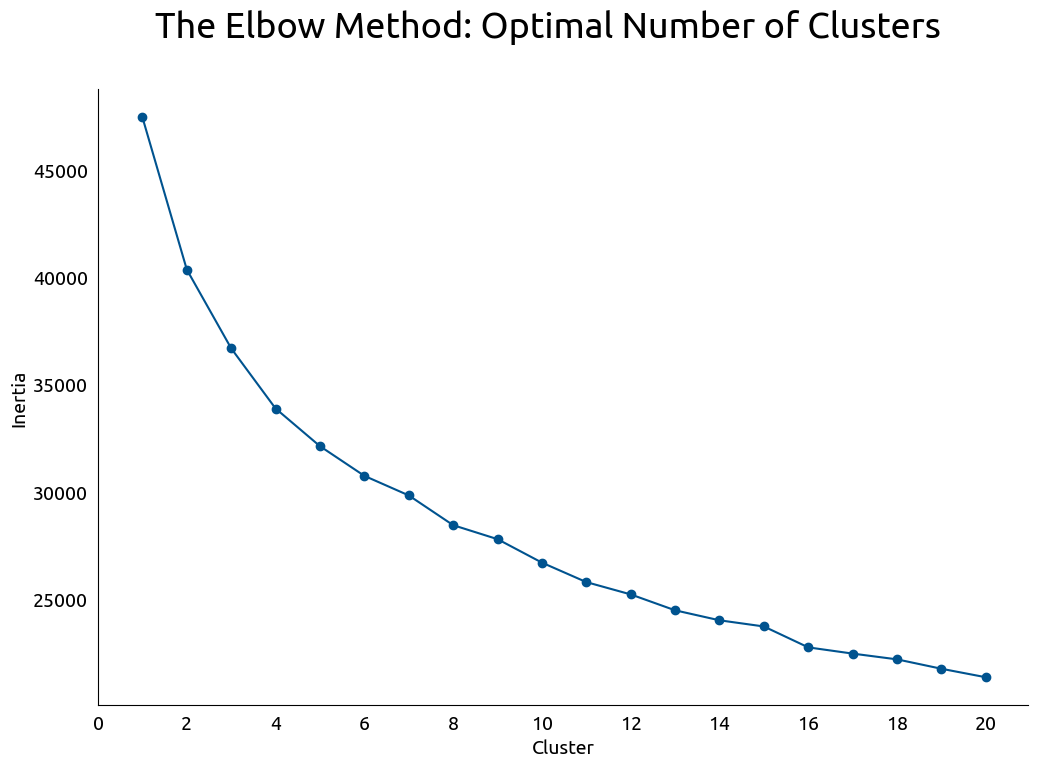

In [65]:
k = pd.concat(km_list, axis=1).T[['clusters','inertia']]

# Visualize
fig, ax = plt.subplots(figsize =(12, 8))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'Ubuntu'
mpl.rcParams['font.size'] = 14

plt.plot(k['clusters'], k['inertia'], 'bo-', color = '#00538F')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top','right']:
    ax.spines[i].set_visible(False)

ax.set_xticks(range(0,21,2))
ax.set(xlabel='Cluster', ylabel='Inertia');

plt.suptitle('The Elbow Method: Optimal Number of Clusters', size=26);

In [73]:
# K-Means
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(X_pca)

data_kmeans = data.copy()

data_kmeans['kmeans'] = km.predict(X_pca)

/home/dimi/miniconda3/envs/datascience/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [78]:
data_kmeans

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,kmeans
0,0,0.855672,-0.648077,-0.546123,-0.217544,-0.104366,-0.696177,-0.764935,0.025059,-0.112877,...,-0.344196,-0.158775,-0.072943,-0.059107,-0.061044,-0.104671,-0.064224,-0.198507,-0.053599,0
1,0,-0.733235,0.667068,0.748133,-0.179801,-0.155363,-0.148110,0.004202,0.023695,-0.099463,...,-0.227907,-0.196858,-0.017478,-0.407475,-0.161789,-0.155478,-0.433532,-0.254222,-0.217524,1
2,0,0.769013,-0.667026,0.782822,-0.352607,-0.085229,-0.040663,0.382448,-0.648990,-0.086674,...,-0.225661,0.018459,-0.047365,-0.065541,0.055906,0.126732,-0.089454,0.276995,-0.499975,0
3,0,-0.868496,-0.066880,-0.635784,0.452011,-0.510071,-0.683666,0.120187,0.061842,-0.242427,...,0.105051,-0.027723,-0.072870,-0.232871,-0.403433,-0.157194,-0.036093,-0.085839,-0.309987,1
4,0,0.764609,-0.633756,-0.295152,-0.359920,-0.041119,0.682170,-0.989707,-0.091912,-0.331400,...,-0.455458,-0.081462,-0.148544,-0.241218,0.035358,-0.004886,0.206711,0.015463,-0.601965,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,1,0.774532,0.821290,-0.275391,-0.446543,0.005486,0.752951,-0.207248,0.109278,-0.517515,...,0.693962,-0.053070,-0.090749,-0.095768,-0.309015,-0.114359,-0.019592,-0.007881,0.094237,0
16996,1,0.622254,0.109292,-0.190612,-0.405310,0.092525,0.285108,0.042642,-0.139134,0.652194,...,0.333242,0.075600,-0.454901,0.175055,-0.086963,-0.117892,0.526584,-0.177339,-0.028992,0
16997,1,-0.029955,-0.686574,0.678144,-0.033956,1.153497,-0.001575,0.148020,0.031209,-0.069378,...,-0.039414,-0.141521,-0.038821,0.029232,-0.074132,-0.109471,-0.021029,-0.179773,-0.013761,1
16998,1,-0.035389,-0.011739,-0.665888,0.760445,0.618758,-0.597166,0.365191,0.304788,-0.264490,...,-0.053588,-0.283389,-0.060055,-0.218445,-0.153653,-0.213798,-0.209747,-0.339728,0.046065,1


In [77]:
import matplotlib.pyplot as plt

# Extract the first two principal components
#pc1, pc2 = X_pca[:, 0], X_pca[:, 1]

# Create a scatter plot and color the points based on cluster label
plt.scatter(pc1, pc2, c=data_kmeans['kmeans'])

# Add axis labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering Results')

# Show the plot
plt.show()


InvalidIndexError: (slice(None, None, None), 0)

hierarchical clustering

In [21]:
# Agglomerative
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='complete', compute_full_tree=True)
ag = ag.fit(X_pca)

data_agglom = data.copy()

data_agglom['agglom'] = ag.fit_predict(X_pca)

modelling with gradient boosting

baseline

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_smote, test_size=0.3, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
    
# The parameters to be fit
param_grid = {
    'learning_rate': [0.1, 0.125, 0.5],
    'n_estimators':[300, 400, 500], 
    'max_depth':[7, 9, 11]       
     }

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='f1',
                      cv = 3,
                      verbose=0, 
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)
print("best score: ", GV_GBC.best_score_)
print("best param: ", GV_GBC.best_params_)

In [ ]:
best_params = GV_GBC.best_params_
GB = GradientBoostingClassifier(random_state=42, **best_params)
                            
GB = GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

K-Means + Model

In [ ]:
from sklearn.model_selection import train_test_split

# Split target & features
X_kmeans = data_kmeans.drop('Attrition_Flag', axis=1)
y_kmeans = data_kmeans['Attrition_Flag']

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X_kmeans, y_kmeans, test_size=0.3, random_state=42)

In [ ]:
best_params = GV_GBC.best_params_
GB = GradientBoostingClassifier(random_state=42, **best_params)
                            
GB = GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

experimentations

cluster=0

In [2]:
# Try prediction with kmeans = 0
from sklearn.model_selection import train_test_split

# Cluster 0
data_kmeans0 = data_kmeans.loc[data_kmeans['kmeans'] == 0]

# Split target & features
X_kmeans = data_kmeans0.drop('Attrition_Flag', axis=1)
y_kmeans = data_kmeans0['Attrition_Flag']

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X_kmeans, y_kmeans, test_size=0.3, random_state=42)

NameError: name 'data_kmeans' is not defined

In [ ]:
best_params = GV_GBC.best_params_
GB = GradientBoostingClassifier(random_state=42, **best_params)
                            
GB = GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

cluster=1

In [ ]:
# Try prediction with kmeans = 1
from sklearn.model_selection import train_test_split

# Cluster 1
data_kmeans1 = data_kmeans.loc[data_kmeans['kmeans'] == 1]

# Split target & features
X_kmeans = data_kmeans1.drop('Attrition_Flag', axis=1)
y_kmeans = data_kmeans1['Attrition_Flag']

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X_kmeans, y_kmeans, test_size=0.3, random_state=42)

In [ ]:
best_params = GV_GBC.best_params_
GB = GradientBoostingClassifier(random_state=42, **best_params)
                            
GB = GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))